<a href="https://colab.research.google.com/github/mvajhi/unsupervised-learning/blob/master/HW1/GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

In [2]:
# Generate some data
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

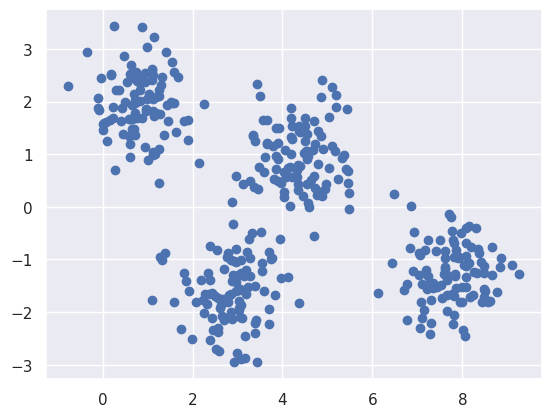

In [3]:
plt.scatter(X[:, 0], X[:, 1]);

## Kmean

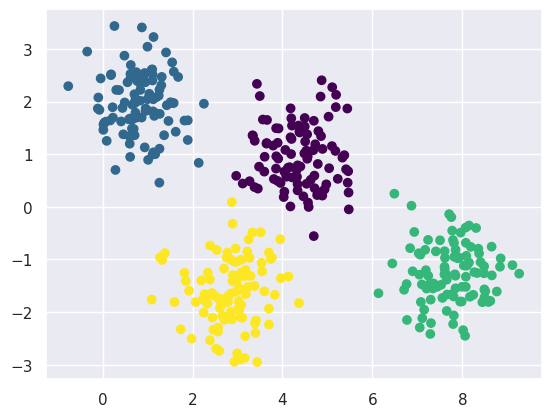

In [10]:
km = KMeans(n_clusters=4).fit(X)
y_kmeans = km.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')

## GMM

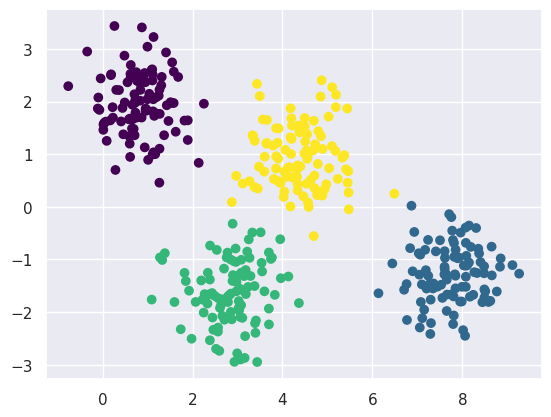

In [49]:
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')

In [15]:
proba = gmm.predict_proba(X)
proba

array([[4.63288197e-01, 1.65215923e-22, 2.44308441e-07, 5.36711559e-01],
       [1.97401298e-17, 4.61002437e-15, 9.99999999e-01, 1.23381253e-09],
       [2.36418727e-14, 2.99373575e-17, 9.99999997e-01, 2.72647597e-09],
       ...,
       [2.13417745e-36, 9.99999929e-01, 1.98562003e-08, 5.16035665e-08],
       [2.75648827e-15, 3.72295841e-04, 4.36840842e-01, 5.62786862e-01],
       [9.78639953e-47, 1.00000000e+00, 5.40633679e-14, 1.37230633e-11]])

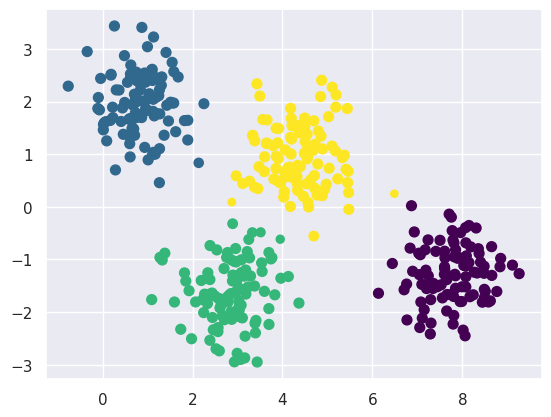

In [36]:
p_max = proba.max(axis=1)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=p_max*50)

In [51]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle=angle, **kwargs))

def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, ax=ax, alpha=w * w_factor)

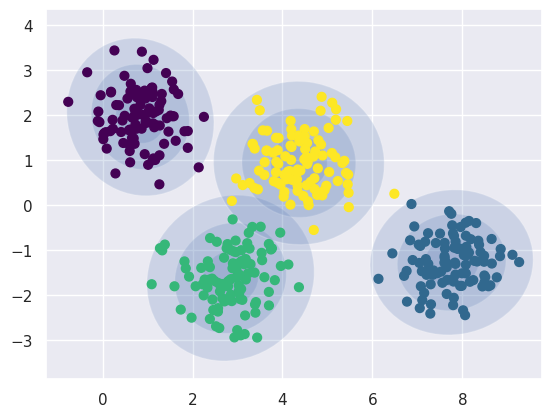

In [52]:
plot_gmm(gmm, X)

### تفسیر نمودار
همانطور که انتظار می رفت مدل توانسته ۴ خوشه را به درستی تشخیص دهد. همچنین بیضی هایی که رسم شده نشان می دهد که پراکندگی داده ها در ۲ جهت یکسان است زیرا شکل دایره گرفته همشچون کانتور ها نشان دهنده درجات مختلف انحراف از معیار هستند.